# Gráficos para Avaliação dos Modelos

# Gráfico de Barra

Um para cada métrica (acurácia, revocação e precisão) representando as médias da tabela anterior com os devidos intervalos de confiança
 - Cada gráfico deverá conter 4+4 barras (com os devidos intervalos de confiança) referentes ao classificador Naive Bayes (da atividade 6) + os de SVM: uma barra para cada dataset (todas, pca, sel 1, sel 2)
 - Não esqueçam de colocar no gráfico e rótulo nas barras e uma legenda no slide explicando a “figura”.

- Cada métrica (acurácia, revocação e precisão) terá um gráfico desses
- Neste exemplo, “cond” (condição) são os datasets 
- Cada cor de barra corresponde a um classificador testado

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from ast import literal_eval
from numpy import nan
from matplotlib.ticker import FormatStrFormatter

sns.set(style="whitegrid")

%matplotlib inline

In [2]:
# leitura do dataset com todos os resultados dos modelos

all_models_results = pd.read_excel('all_models_results.xlsx')

print(all_models_results.shape)

# Ordena os algoritmos na ordem que foram criados
classificadores = ['Naive Bayes', 'SVC', 'MLPClassifier', 'RandomForestClassifier']
all_models_results.Algoritmo = pd.Categorical(all_models_results.Algoritmo,categories = classificadores) 
all_models_results=all_models_results.sort_values('Algoritmo')

# Ordena pelo dataset e métrica
all_models_results = all_models_results.sort_values(['Condicao','Metrica' ],ascending=False)

all_models_results.head()

(168, 10)


,Algoritmo,Atividade,Condicao,Melhores_Params,Metrica,Valor,Intervalo_Confianca,ic_up,ic_down,diff_ics
94,Naive Bayes,6,ReliefF Desbalanceado - Normalizado (10),0.8,Recall,0.696667,"[0.697, 0.575, 0.818]",0.575000,0.818000,-0.243000
28,SVC,7,ReliefF Desbalanceado - Normalizado (10),"('rbf', 1, '0.10010000000000001')",Recall,0.660000,"[0.6599999999999999, 0.5210505155810267, 0.798...",0.521051,0.798949,-0.277899
139,MLPClassifier,8,ReliefF Desbalanceado - Normalizado (10),"((5, 7), 0.1, 'relu', 0.3, 300, False)",Recall,0.770000,"[0.770, 0.582, 0.958]",0.582000,0.958000,-0.376000
55,RandomForestClassifier,9,ReliefF Desbalanceado - Normalizado (10),"('log2', 200, 5.0, 4)",Recall,0.736667,"[0.737, 0.600, 0.873]",0.600000,0.873000,-0.273000
95,Naive Bayes,6,ReliefF Desbalanceado - Normalizado (10),0.8,Precision,0.753810,"[0.754, 0.587, 0.921]",0.587000,0.921000,-0.334000


In [3]:
# Quantidade de algoritmos

qtd_algo = len(set(all_models_results['Algoritmo']))

qtd_algo

4

# Accuracy

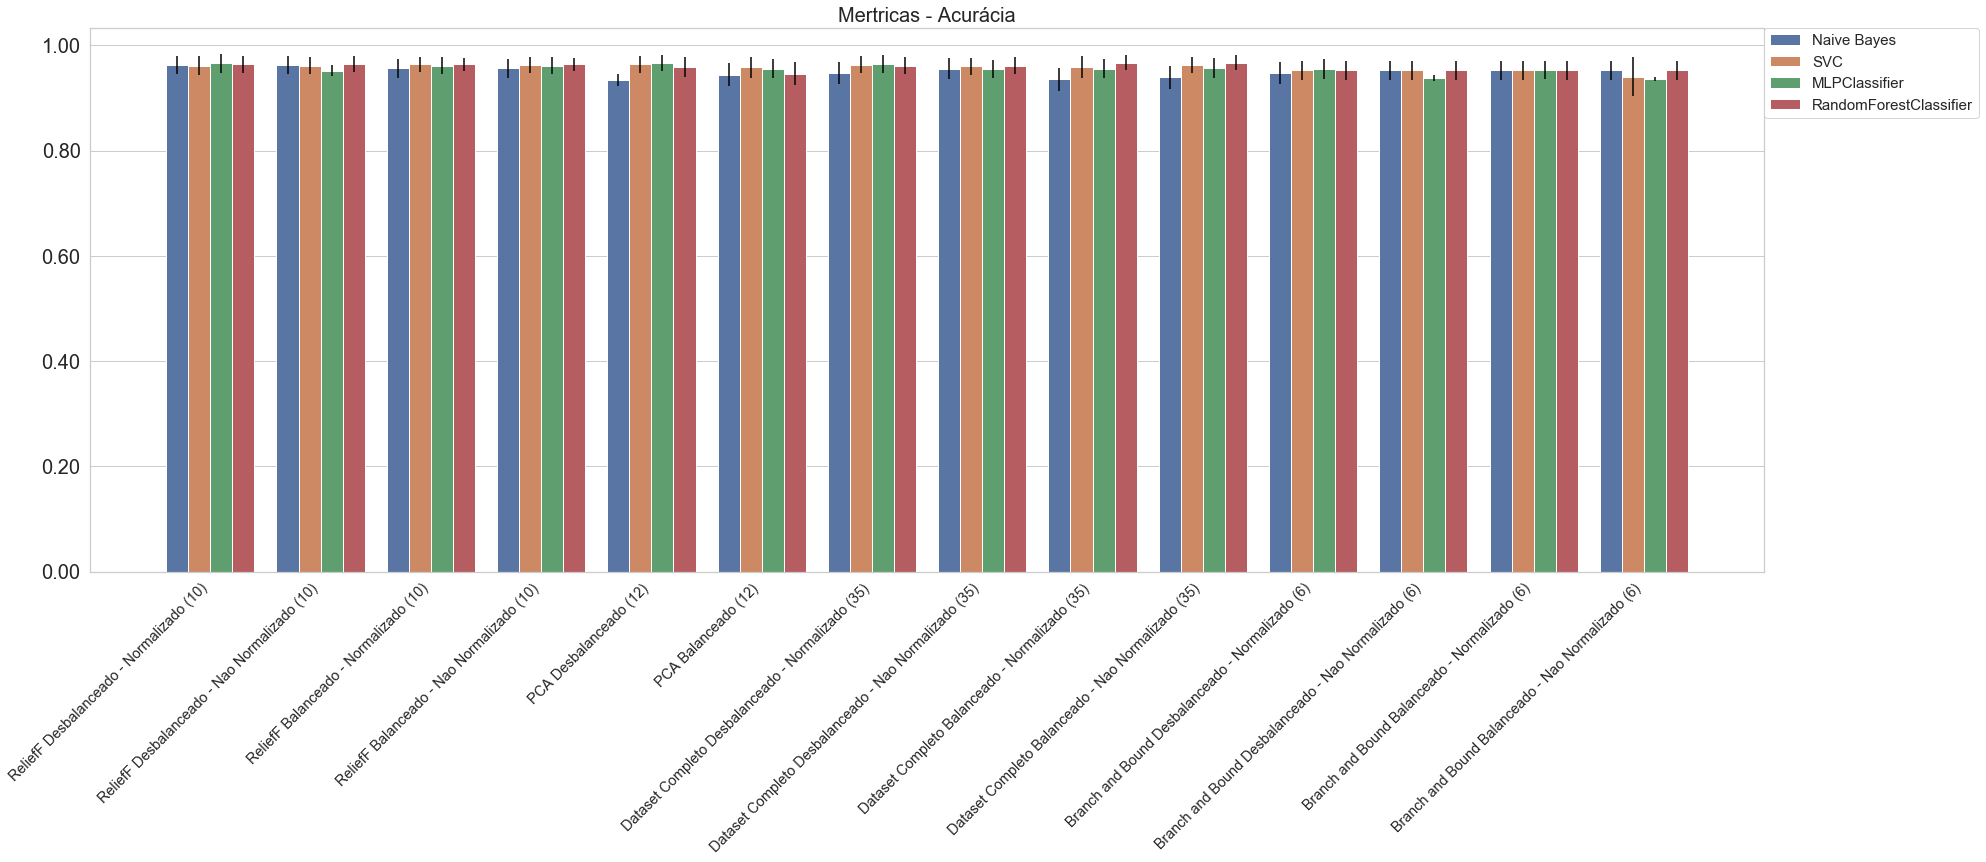

In [4]:
plt.figure(figsize=(30,10))

metrica = 'Accuracy'
df_acc = all_models_results[all_models_results['Metrica'] == metrica]

ax_acc = sns.barplot(x='Condicao', y='Valor',  hue='Algoritmo', data=df_acc)
plt.title('Mertricas - Acurácia', fontsize=20)

plt.xticks( rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

#plt.ylim(0, 1.1)

for idx, ci in enumerate(df_acc['Intervalo_Confianca']):
    # transforma em lista
    ci = literal_eval(ci)
    mean = ci[0]
    ci_max = ci[1]
    ci_min = ci[2]
    #plt.errorbar(x=df_acc['Condicao'].index,y=mean,yerr= (ci_max - mean) , fmt='none', color = 'black', barsabove=True)
    if(idx%qtd_algo == 0):
        plt.errorbar(x = -.3 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%qtd_algo == 1):
        plt.errorbar(x = -.35 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%qtd_algo == 2):
        plt.errorbar(x = -.4 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    else:
        plt.errorbar(x = -.45 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)

# Coloca a legenda fora do grafico 
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize = 15)

# Aumenta tamanho dos yticks e remove labels
ax_acc.set_yticklabels(ax_acc.get_yticks(), size=20)
ax_acc.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_acc.set_ylabel('')
ax_acc.set_xlabel('') 

plt.savefig('avaliacao_modelo_accuracy.png',  bbox_inches='tight')

plt.show()

# Recall

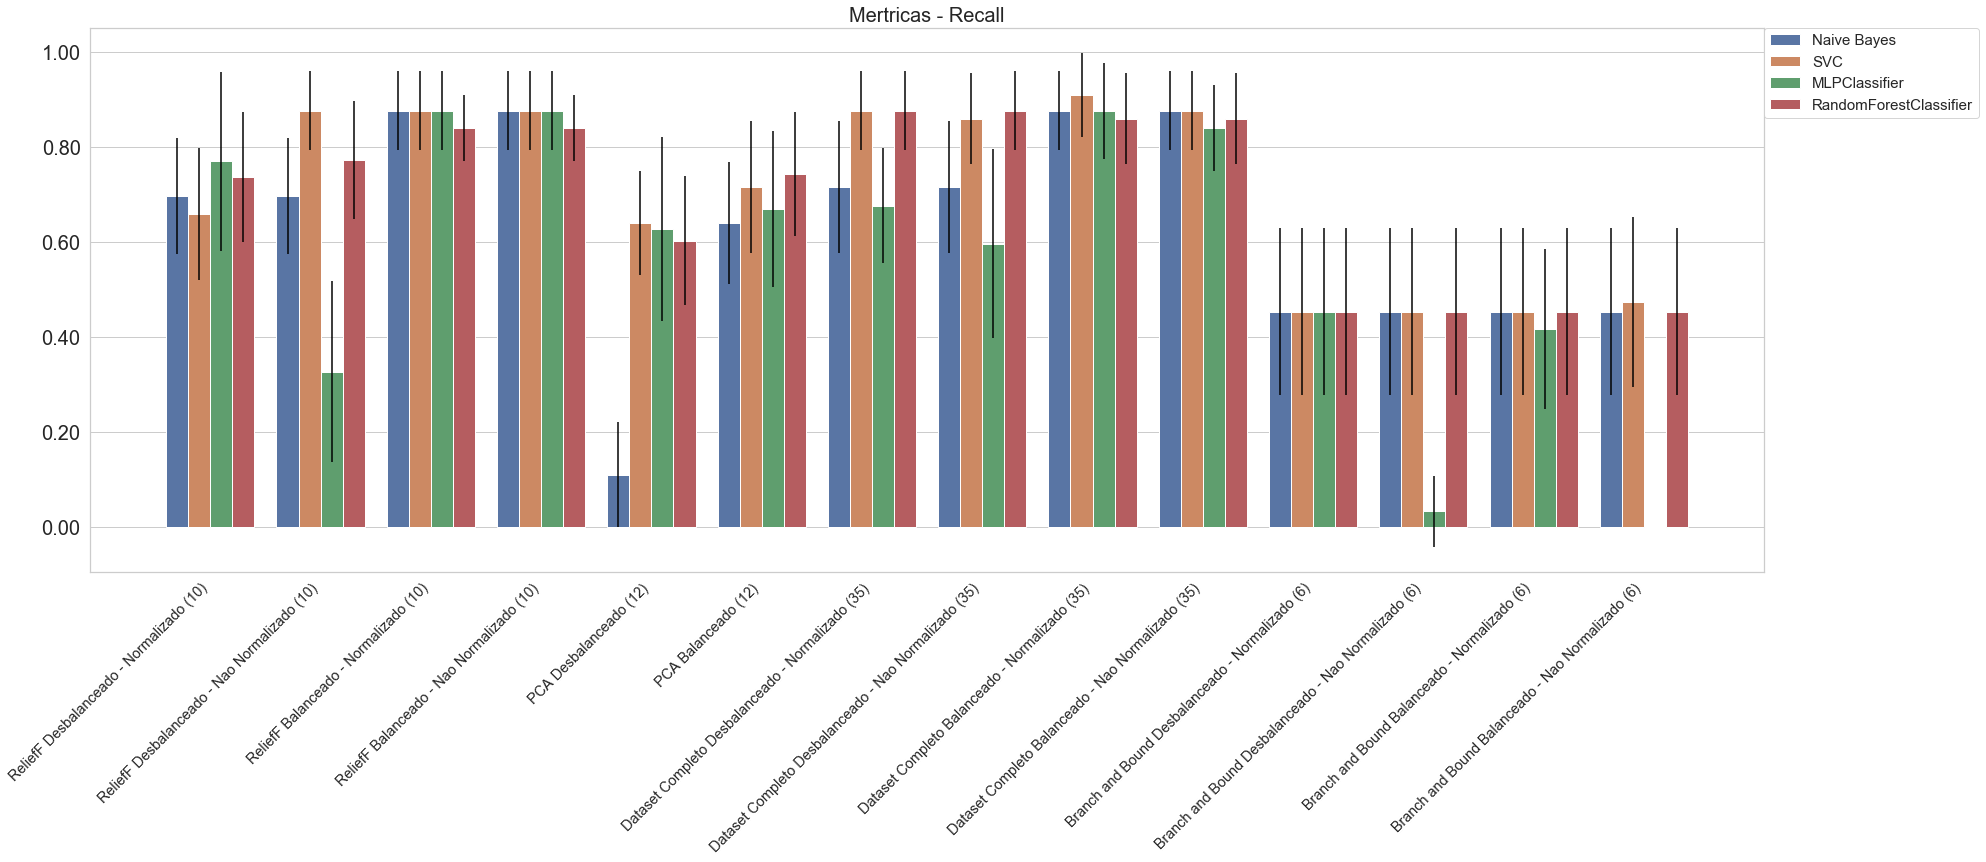

In [5]:
plt.figure(figsize=(30,10))

metrica = 'Recall'
df_rec = all_models_results[all_models_results['Metrica'] == metrica]

ax_rec = sns.barplot(x="Condicao", y="Valor", hue='Algoritmo', data=df_rec)
plt.title('Mertricas - Recall', fontsize=20)

plt.xticks( rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

#plt.ylim(0, 1.1)

for idx, ci in enumerate(df_rec['Intervalo_Confianca']):
    ci = ci.replace('nan', '0')
    # transforma em lista
    ci = literal_eval(ci)
    mean = ci[0]
    ci_max = ci[1]
    ci_min = ci[2]
    #plt.errorbar(x=df_acc['Condicao'].index,y=mean,yerr= (ci_max - mean) , fmt='none', color = 'black', barsabove=True)
    if(idx%qtd_algo == 0):
        plt.errorbar(x = -.3 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%qtd_algo == 1):
        plt.errorbar(x = -.35 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%qtd_algo == 2):
        plt.errorbar(x = -.4 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    else:
        plt.errorbar(x = -.45 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
 

plt.legend(fontsize = 15)

# Coloca a legenda fora do grafico 
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize = 15)

# Aumenta tamanho dos yticks e remove labels
ax_rec.set_yticklabels(ax_acc.get_yticks(), size=20)
ax_rec.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_rec.set_ylabel('')
ax_rec.set_xlabel('') 

plt.savefig('avaliacao_modelo_recall.png',  bbox_inches='tight')

plt.show()

# Precision

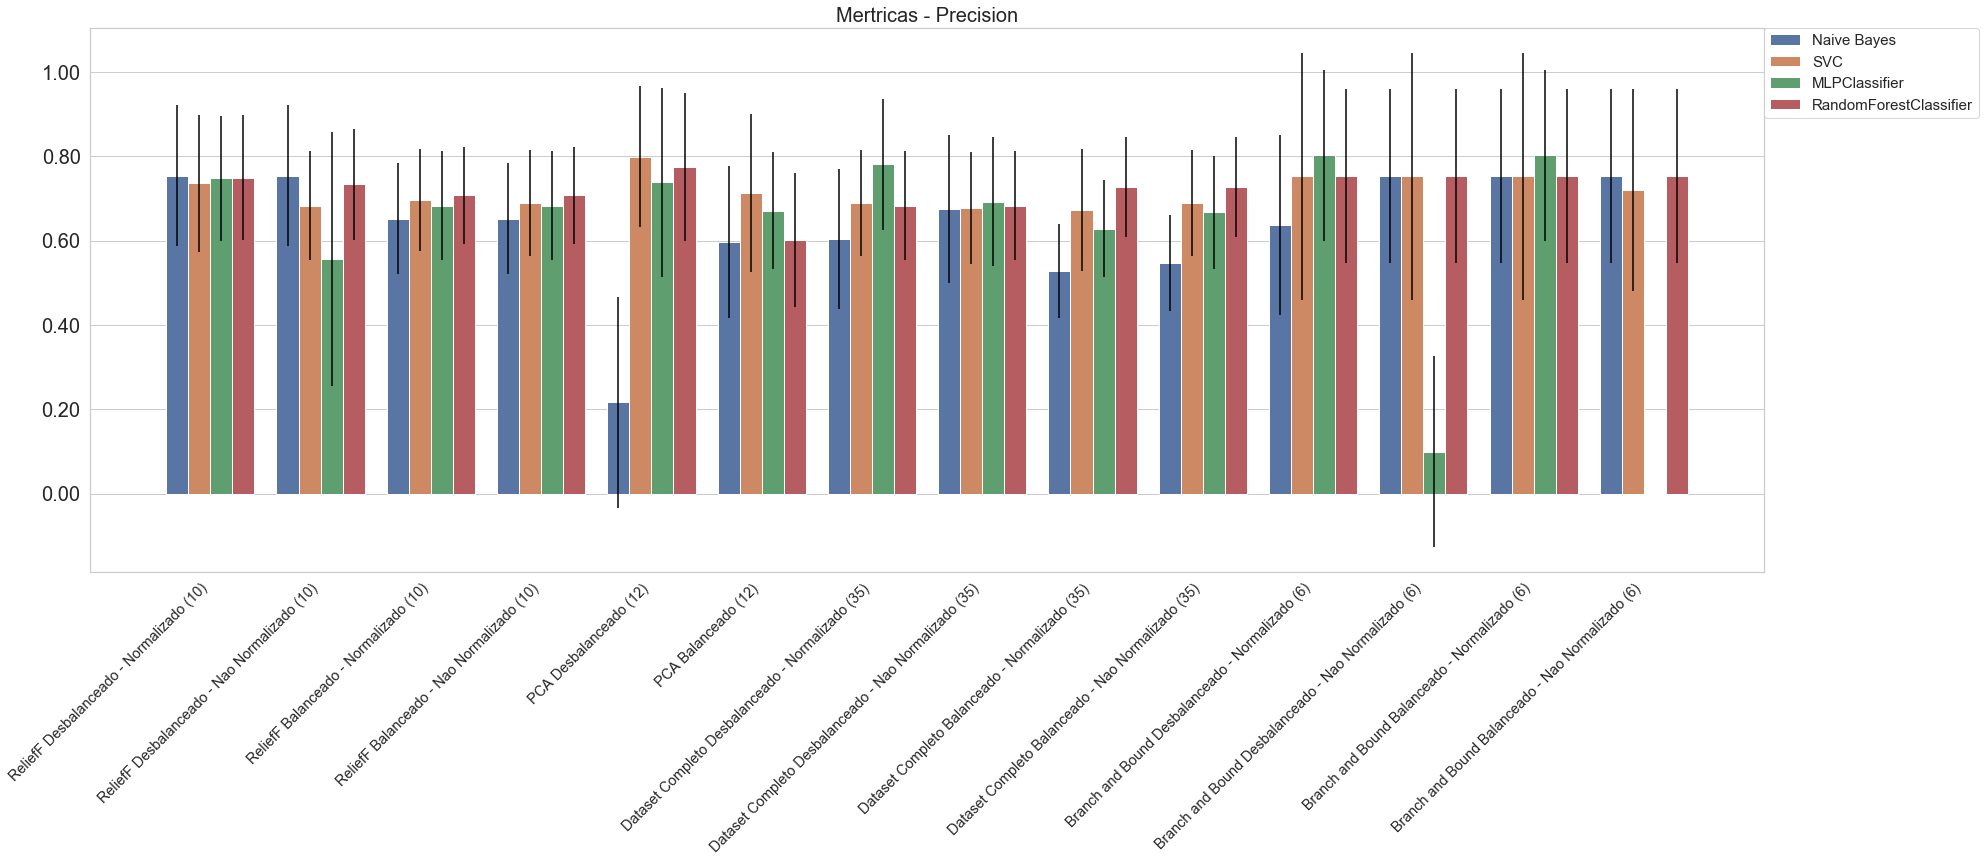

In [6]:
plt.figure(figsize=(30,10))

metrica = 'Precision'
df_pre = all_models_results[all_models_results['Metrica'] == metrica]

ax_pre = sns.barplot(x="Condicao", y="Valor", hue='Algoritmo', data=df_pre)
plt.title('Mertricas - Precision', fontsize=20)

plt.xticks( rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

#plt.ylim(0, 1.1)

for idx, ci in enumerate(df_pre['Intervalo_Confianca']):
    ci = ci.replace('nan', '0')
    # transforma em lista
    ci = literal_eval(ci)
    mean = ci[0]
    ci_max = ci[1]
    ci_min = ci[2]
    #plt.errorbar(x=df_acc['Condicao'].index,y=mean,yerr= (ci_max - mean) , fmt='none', color = 'black', barsabove=True)
    if(idx%qtd_algo == 0):
        plt.errorbar(x = -.3 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%qtd_algo == 1):
        plt.errorbar(x = -.35 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%qtd_algo == 2):
        plt.errorbar(x = -.4 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    else:
        plt.errorbar(x = -.45 +idx/qtd_algo, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
 
plt.legend(fontsize = 15)

# Coloca a legenda fora do grafico 
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize = 15)


# Aumenta tamanho dos yticks e remove labels
ax_pre.set_yticklabels(ax_acc.get_yticks(), size=20)
ax_pre.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_pre.set_ylabel('')
ax_pre.set_xlabel('') 


plt.savefig('avaliacao_modelo_precision.png',  bbox_inches='tight')

plt.show()